# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [208]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


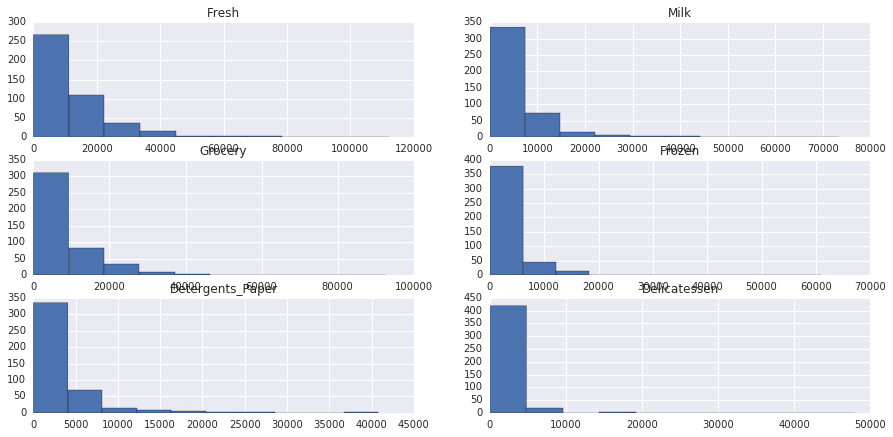

In [33]:
import matplotlib.pyplot as pl
import seaborn as sns
fig, ax = pl.subplots(3, 2, figsize = (15,7))
for i in range(data.shape[1]):
        ax[i/2, i%2].hist(data[data.columns[i]]);
        ax[i/2, i%2].set_title(data.columns[i])

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [45]:
#pick a buyer that buys a lot of 'Fresh' and less of Milk and Frozen
data[ (data['Fresh']> 10000) & (data['Milk'] < 1000) & (data['Frozen'] < 1000)]
#I'll pick row 288

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
27,14276,803,3045,485,100,518
191,13624,295,1381,890,43,84
288,16260,594,1296,848,445,258
323,13360,944,11593,915,1679,573


In [43]:
#pick a buyer that buys a lot of Detergents_Paper and less of Fresh and Grocery
data[ (data['Detergents_Paper'] > 1000) & (data['Fresh'] < 2000) & (data['Grocery'] < 2000)]
#I'll pick row 228

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
228,1869,577,572,950,4762,203


In [44]:
# pick a buyer that has a lot of Delicatessan purchases and not as much milk or Grocery
data[ (data['Delicatessen'] > 1000) & (data['Milk'] < 1000) & (data['Grocery'] < 1000)]
#I'll pick row 39

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
39,56159,555,902,10002,212,2916
161,12434,540,283,1092,3,2233


In [46]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [288, 228, 39]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16260,594,1296,848,445,258
1,1869,577,572,950,4762,203
2,56159,555,902,10002,212,2916


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first customer's purchases are higher in the 'Fresh' and 'Grocery' category.  This could be a grocery store or a restaurant / cafeteria.

The second customer's purchases are higher in Detergents_paper and less in 'Frozen', 'Fresh', and 'Grocery'.  This could be a hotel, which needs detergent to clean bed sheets and towels.

The third customer's purchases are higher in Delicatessen and Fresh categories.  This could be a restaurant or fast food store.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [71]:
def predict_purchase(data, y_name):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([y_name], axis=1)
    new_y = data[y_name]
    
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_y, test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor = regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print "score for predicting {} is {:.2f}".format(y_name, score)

In [72]:
for y_name in data.columns:
    predict_purchase(data,y_name)

score for predicting Fresh is -0.25
score for predicting Milk is 0.37
score for predicting Grocery is 0.60
score for predicting Frozen is 0.25
score for predicting Detergents_Paper is 0.73
score for predicting Delicatessen is -11.66


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict each purchase category using the other remaining five categories.  

The categories 'Fresh' (-0.25) and 'Delicatessen' (-11.66) have a negative R-squared, and 'Milk' (0.37) and 'Frozen' (0.25) have an R-squared under 0.50. So each of these four categories cannot be predicted using the other five, and appear not to be correlated with any of the other categories.  This also means that they are probably necessary for identifying customer spending habits, because their information cannot be substituted by the other ones.

The categories 'Grocery' (0.60) and 'Detergents_Paper' (0.73) have higher R-squared values above 0.50, so each of these can be somewhat predicted by the other remaining five categories.  That means that each of these is somewhat correlated with at least one of the other five categories.  It also means that removing one of these, while keeping the other five, may still allow us to identify customer spending habits.  We probably don't necessarily want to remove both at the same time, because it's possible that these two items are the ones that are correlated with each other.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

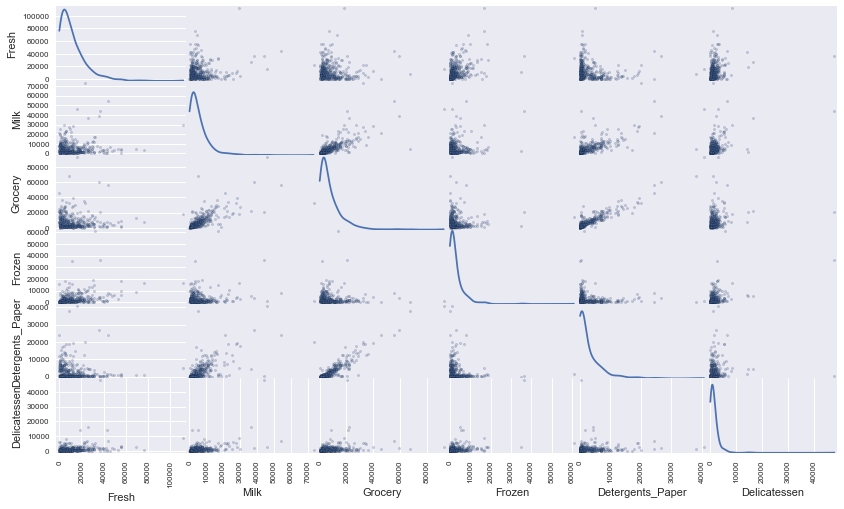

In [70]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Grocery and Detergents_Paper have a fairly linear relationship.  This confirms the previous exploration into the predictability of each category by the others.  Each of Grocery and Detergents_Paper could be somewhat predicted by the remaining five because these two are correlated.  

The data non-normally distributed, as it is skewed right. Outliers exist in the high values, and most of the customers are found in the lower end of values, so the majority of customers have purchases below the mean of all purchases.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

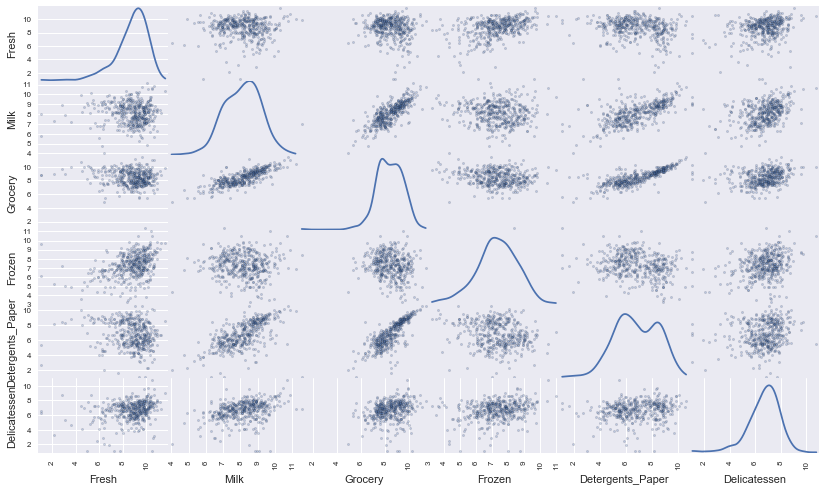

In [73]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [74]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.696463,6.386879,7.167038,6.742881,6.098074,5.552960
1,7.533159,6.357842,6.349139,6.856462,8.468423,5.313206
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


The log transforms the data to be more normally distrubted (bell curve shaped).  The linear relationship between Grocery and Detergents_Paper is even more clear after the log transformation.  In fact, other pairs of categories exhibit a discernable linear relationship as well (for example, Grocery and Milk).

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [226]:
# For each feature find the data points with extreme high or low values
outliers = []

log_data_outliers_dict = {}
for feature_i, feature in enumerate(log_data.keys()):
    print 'feature {}'.format(feature)
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    print "Q1 {}, Q3 {}, step {}".format(Q1,Q3,step)
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    log_data_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(log_data_outliers)
    outliers.extend(log_data_outliers.index)
    log_data_outliers_dict[feature] = log_data_outliers
        
# OPTIONAL: Select the indices for data points you wish to remove
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

feature Fresh
Q1 8.04805870221, Q3 9.73706394795, step 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


feature Milk
Q1 7.33498124004, Q3 8.88048008859, step 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


feature Grocery
Q1 7.67461620137, Q3 9.27385367724, step 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


feature Frozen
Q1 6.60967774917, Q3 8.17589608318, step 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


feature Detergents_Paper
Q1 5.54810142479, Q3 8.27434059875, step 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


feature Delicatessen
Q1 6.01187465693, Q3 7.50672842655, step 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


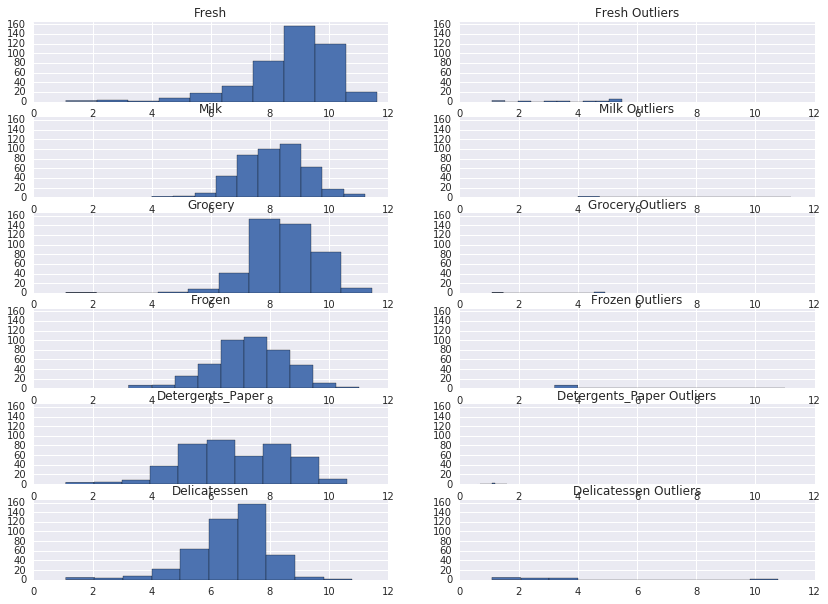

In [229]:
fig, ax = pl.subplots(6, 2, figsize = (14,10))

for feature_i, feature in enumerate(log_data.keys()):
    col=0
    
    ax[feature_i, col].hist(log_data[log_data.columns[feature_i]]);
    ax[feature_i, col].set_title(log_data.columns[feature_i])
    ax[feature_i, col].set_ylim((0, 165))
    ax[feature_i, col].set_xlim((0, 12))
    
    col=1
    log_data_outliers = log_data_outliers_dict[feature]
    ax[feature_i, col].hist(log_data_outliers[log_data_outliers.columns[feature_i]]);
    ax[feature_i, col].set_title(log_data_outliers.columns[feature_i] + ' Outliers')
    ax[feature_i, col].set_ylim((0, 165))
    ax[feature_i, col].set_xlim((0, 12))


In [98]:
for i in indices:
    try:
        outliers.index([i])
        print "index {} was an outlier".format(index)
    except ValueError:
        print "index {} was not an outlier".format(i)

index 288 was not an outlier
index 228 was not an outlier
index 39 was not an outlier


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [117]:
from collections import Counter
outliers_freq = Counter(outliers)
sorted(outliers_freq.items(), cmp=lambda x,y: cmp(x[1], y[1]), reverse=True)

[(154, 3),
 (128, 2),
 (65, 2),
 (66, 2),
 (75, 2),
 (193, 1),
 (264, 1),
 (137, 1),
 (142, 1),
 (145, 1),
 (412, 1),
 (285, 1),
 (161, 1),
 (420, 1),
 (38, 1),
 (171, 1),
 (429, 1),
 (175, 1),
 (304, 1),
 (305, 1),
 (439, 1),
 (184, 1),
 (57, 1),
 (187, 1),
 (203, 1),
 (325, 1),
 (289, 1),
 (81, 1),
 (338, 1),
 (86, 1),
 (343, 1),
 (218, 1),
 (95, 1),
 (96, 1),
 (353, 1),
 (98, 1),
 (355, 1),
 (356, 1),
 (357, 1),
 (233, 1),
 (109, 1),
 (183, 1)]

**Answer:**

Data points that were outliers for more than one feature were row 154, 128,65, 66, 75.

I removed any data point that had at least one feature beyond 1.5 times the inter-quartile range.  This is because for clustering, the center of each cluster is determined based on its distance to all points that are assigned to the cluster.  So the center of each cluster is affected by outliers.  

Based on the histogram plots of each feature next to the outliers of the feature, the outliers are far from other points, and they will be far from cluster centers as well.  Since clustering if based on finding groups of points that are similar to each other, outliers are unlikely to form or be included in a useful cluster.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [118]:
from sklearn.decomposition import PCA

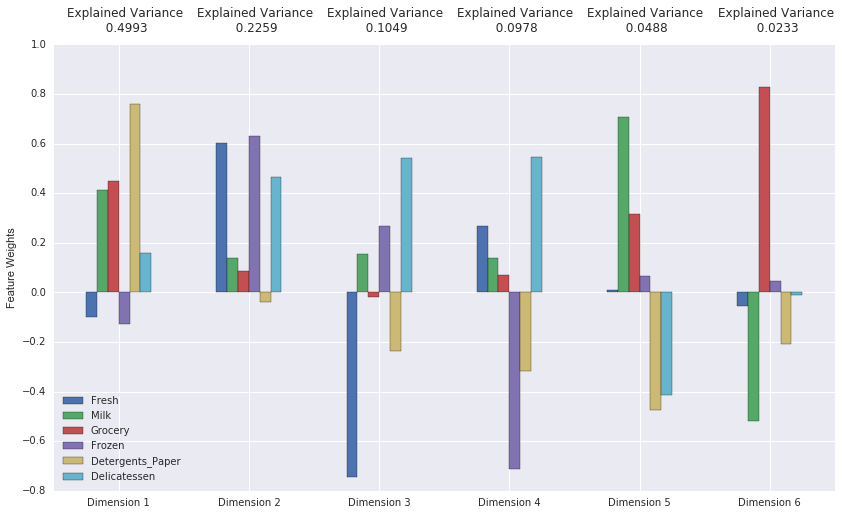

In [131]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [120]:
#Each row is a component; and each column is the original feature's weights for that component)
pca.components_

array([[-0.09758688,  0.41085006,  0.45111781, -0.12804262,  0.75951245,
         0.15785331],
       [ 0.60077834,  0.1369893 ,  0.08516261,  0.62996118, -0.03761194,
         0.46344461],
       [-0.74520543,  0.15440822, -0.02038937,  0.26695167, -0.23485013,
         0.54221164],
       [ 0.26670888,  0.13749532,  0.0709773 , -0.71328102, -0.31568384,
         0.54451588],
       [ 0.0114087 ,  0.70825884,  0.31682301,  0.06711674, -0.47290085,
        -0.41197399],
       [-0.05428877, -0.51774387,  0.82668599,  0.04707807, -0.20803866,
        -0.00937317]])

In [121]:
pca.explained_variance_ratio_

array([ 0.49930484,  0.22594807,  0.10488309,  0.09781761,  0.04879109,
        0.0232553 ])

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [126]:
print "Variance explained by 1st and 2nd component {:.4f}".format(sum(pca.explained_variance_ratio_[0:2]))
print "Variance explained by 1st to 4th component {:.4f}".format(sum(pca.explained_variance_ratio_[0:4]))
print "Variance explained by 1st to 6th component {:.4f}".format(sum(pca.explained_variance_ratio_[0:6]))

Variance explained by 1st and 2nd component 0.7253
Variance explained by 1st to 4th component 0.9280
Variance explained by 1st to 4th component 1.0000


**Answer:**

The first two principle components account for 75% of the total variance, whereas the first four account for 93% of the total variance.

The first dimension is mostly determined by Detergents and Paper purchases, and also by Grocery and Milk.  These three categories are correlated, and either increase together or decrease together.  An increase along the first component suggests an increase in purchases of these three categories.  Moreover, an increase in the first dimension corresponds to a decrease in Fresh and Frozen purchases.

The second dimension is mostly determined by Fresh, Frozen and Milk purchases.  An increase in the second component corresponds to an increase in purchases of these three categories.

The third dimension is determined mostly by a decrease in Fresh purchases along with an increase in Delicatessen purchases.  This means that the two categories are negatively correlated.  An increase in the third component corresponds to a decrease in Fresh purchases and an increase in Delicatessen purchases.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [127]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.9844,-0.8707,-1.5090,-0.0963,-0.8220,-0.0553
1,-0.4063,-2.3727,-0.5411,-1.6951,-2.1409,-1.0845
2,-2.7931,2.5401,-0.2880,-0.0064,-1.4536,-0.1394


In [128]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16260,594,1296,848,445,258
1,1869,577,572,950,4762,203
2,56159,555,902,10002,212,2916



#### Sample 1

In the first dimension, Fresh purchases and negatively weighted while Detergents and Paper is positively weighted.  Sample 1 has high Fresh purchases and low Detergents and Paper purchases, so it moves along the negative direction along the first dimension (-1.9844).

The second dimension has positive weights for Frozen, Delicatessen, and Fresh purchases.  So a small purchase in Delicatessen and Frozen translates to a negative move along the second dimension, whereas a high purchase in Fresh corresponds to a positive move along the second dimension.  The first sample has a negative move along the second dimension (-0.8707), so the effect of low purchases in Frozen and Delicatessen exceed the influence of the high purchases in Fresh.

The third dimension has a strongly negative weight on Fresh purchases, and a positive weight on Delicatessen.  Sample 1 has both high Fresh purchases and low Delicatessen purchases, so it moves in the negative direction along the third dimension (-1.5090).

#### Sample 2
In the first dimension, Detergents and Paper purchases are positively weighted, and the second sample has high Detergents and Paper purchases, which would correspond to a positive move along the first dimension.  However, the Grocery and Milk purchases are also positively weighted, whereas sample 2 has low purchases in Grocery and Milk.  It appears that the low purchases in Grocery and Milk exceed the effect of high purchases in Detergent and Paper, leading to a small negatie move along the first dimension (-0.4063).

The second dimension is negatively weighted for Detergent and Paper, and positively weighted for Fresh, Frozen and Delicatessen.  Sample 2 has high purchass in Detergent and Paper and low purchases in Fresh, Frozen and Delicatessen, leading to a strongly negative move along the second dimension (-2.3727).

The third dimension is negatively weighted for Detergents and Paper, while positively weighted for Delicatessen.  Since sample 2 has high Detergents and Paper purchases and low Delicatessen purchases, it moves negatively along the third dimension (-0.5411).  The negative direction is somewhat counter-acted by the low purchases in Fresh, which is strongly negatively weighted, and would push sample 2 more towards the postive direction along the third dimension.

#### Sample 3

The first dimension is negatively weighted for Fresh, and positively weighted for Detergents and Paper.  Sample 3 has high Fresh purchases and low Detergents and paper puchases, leading to a negative move along the first dimension (-2.7931).

The second dimension positively weighted for Fresh, Frozen and Delicatessen.  Sample 2 has high purchases in all three of these categories, leading to a positive move along the second dimension (2.5401).

The third dimension is negatively weighted for Fresh, whereas sample 3 has high Fresh purchases.  This moves sample 3 negatively along the third dimension (-0.2880).  This negative move is counter-acted by large Delicatessen purchases, which are weighted positively for the third dimension.

References:
https://onlinecourses.science.psu.edu/stat505/node/54

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [133]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples2 = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [134]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples2, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.9844,-0.8707
1,-0.4063,-2.3727
2,-2.7931,2.5401


In [135]:
#Samples' coordinates when fitting on first 6 dimensions, for comparison
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.9844,-0.8707,-1.5090,-0.0963,-0.8220,-0.0553
1,-0.4063,-2.3727,-0.5411,-1.6951,-2.1409,-1.0845
2,-2.7931,2.5401,-0.2880,-0.0064,-1.4536,-0.1394


Looking at the transformed coordiantes for the thee samples, we can see that the coordinates for dimensions 1 and 2 are the same whether we fit PCA to the first 2 dimensions or to the first 6 dimensions.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

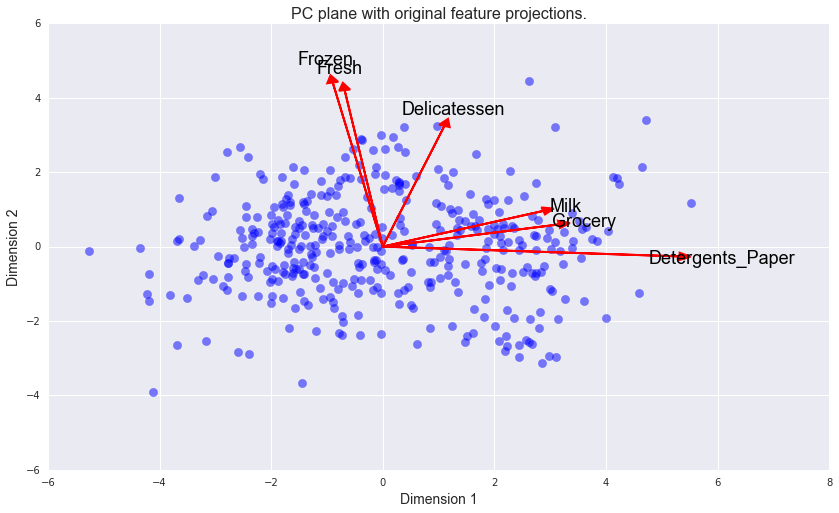

In [136]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Detergents and Paper, Milk and Grocery and strongly correlated with the first component, as the first dimension is aligned from left to right, and these three features have large weights in the first dimension relative to their weights in the second dimension.

Fresh, Frozen and Delicatessen are strongly correlated with the second component, as the second dimension is aligned up and down, and these three features have large weights in the second dimension.

These results match with the bar plot showing the weight of each feature for each dimension.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means is computationally efficient, since it has fewer parameters (just the number of components) and weights that is needs to learn.  K-means can also scale better when working with a large number of dimensions.  Gaussian Mixture Models are more flexible, in that they do not assume that clusters have a circular shape, do not assume that clusters are of the same size (in terms of the spread of the observations), and do not assume that each feature is weighted the same as all other features.  Also, Gaussian Mixture Models gives a soft assignment of each observation to more than one cluster, instead of giving a hard assignment of each observation to at most one cluster.

Based on the biplot of two principle component dimensions, the observations don't show visually distinct clusters, and so we want to account for the possibility that an observation has a probability of being in more than one cluster.  Also, we have limited the number of dimensions to two using principal component analysis. In this case a Gaussian Mixture Model has the flexibility to find clusters in this data set.

References:
https://www.coursera.org/learn/ml-clustering-and-retrieval/lecture/I6FYH/motiving-probabilistic-clustering-models
http://scikit-learn.org/stable/modules/clustering.html

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [188]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def cluster_fit_score(n_components):
    clusterer = GaussianMixture(n_components=n_components, random_state=0)
    clusterer = clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples2)
    
    sample_probs = clusterer.predict_proba(pca_samples2)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

    score = silhouette_score(reduced_data, preds, random_state=0)
    
    return (preds, centers, score, sample_preds, sample_probs)

In [183]:
for n_components in [2,3,4,5,6,7,8]:
    (preds, centers, score, sample_preds, sample_probs) = cluster_fit_score(n_components)
    print "Fit Gaussian Mixture Model with {} clusters, silhouette score {:.4f}".format(n_components, score)

Fit Gaussian Mixture Model with 2 clusters, silhouette score 0.4468
Fit Gaussian Mixture Model with 3 clusters, silhouette score 0.3526
Fit Gaussian Mixture Model with 4 clusters, silhouette score 0.3151
Fit Gaussian Mixture Model with 5 clusters, silhouette score 0.3136
Fit Gaussian Mixture Model with 6 clusters, silhouette score 0.3384
Fit Gaussian Mixture Model with 7 clusters, silhouette score 0.2499
Fit Gaussian Mixture Model with 8 clusters, silhouette score 0.3199


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I tried numbers of clusters from 2 to 8.  The silhouette scores ranged from 0.2499 to 0.4468, with the high score of .4468 resulting from 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

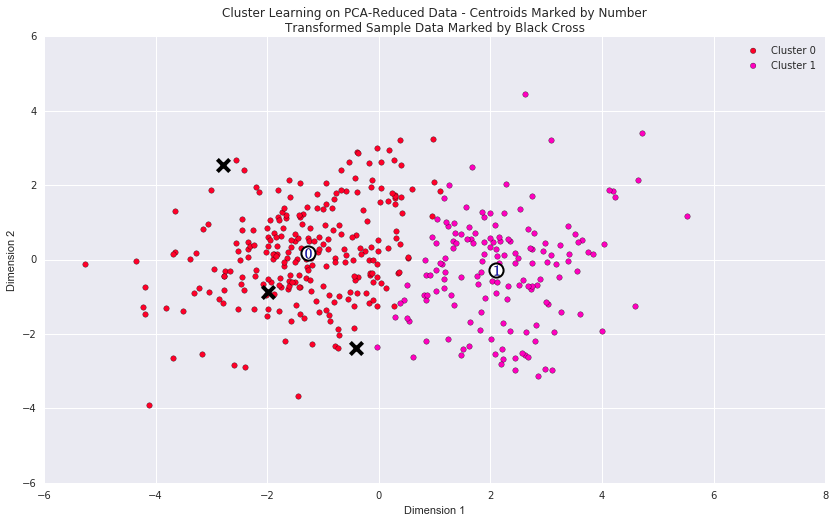

In [189]:
# Display the results of the clustering from implementation
n_components=2
(preds, centers, score, sample_preds, sample_probs) = cluster_fit_score(n_components)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [185]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [178]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

Segment 0 has Fresh purchases above the median (50th percentile), and all other purchases below the median.

Segment 1 has Milk, Detergents and Paper above the median, and all other purchases are below the median.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [186]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster"

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [181]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16260,594,1296,848,445,258
1,1869,577,572,950,4762,203
2,56159,555,902,10002,212,2916


In [187]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [195]:
pd.DataFrame(sample_probs, columns=['Segment 0', 'Segment 1'])

,Segment 0,Segment 1
0,0.998542,0.001458
1,0.715183,0.284817
2,0.999929,0.000071


**Answer:**

Sample 0 has fresh purchases above the median, and all other purchases below the median, similar to cluster 0.  So it makes sense that sample 0 is assigned to cluster 0.  Looking at the probabilities, sample 0 has a .9985 probability of being in Segment 0 and .0015 probability of being in Segment 1.

Sample 1 has Detergents and Paper purchases above the median, similar to segment 1.  However, sample 1 also has milk, grocery, frozen, and delicatessen purchases below the median, like Segment 0.  Sample 1 has a 0.7152 probability of being in Segment 0 and 0.2848 probability of being in Segment 1, so it is assigned to Segment 0.

Sample 2 has Fresh and Delicatessen purchases above the median, and all other purchases below.  Similarly, segment 0 has Fresh purchases above the median.  Sample 2 has a .9999 probability of being in Segment 0 and .0000 probability of being in Segment 1, so it is assigned to Segment 0.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Since clustering assigns each customer to a group, we can assume that each group's similarity in purchases may translate to similarity in their reaction to delivery service.  Then, for each cluster group, we can run an A/B test; within each group, we randomly assign buyers to a control group (original 5 days a week of service) or experiment group (the proposed 3 days a week of service).  We can define a metric that represents the buyers' positive or negative reaction.  For instance, a positive reaction would be no significant change in quantity of purchases, whereas a negative reaction could be represented by a decrease in purchases beyond a certain level of practical significance (for example, a 3% overall decrease in total purchases of each customer).

We will obtain testing results for each cluster group separately.  If, for example, cluster 0 shows no practically significant reduction in purchases, we can generalize this finding to other buyers that our clustering would assign to cluster 0.  This means that we can recommend the delivery service change to all customers that are assigned to cluster 0.

Similarly, if cluster 1 testing showed a practically significant drop in purchases, we can generalize this to all customers that we would assign to cluster 1, and recommend not making the delivery service change for that group.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use supervised classification, where the features are the original 6 purchase amounts. We can fit a logistic regression model (or another classifier) for each customer segment. For example, for customer segment 'A', assign the target value 1 if the customer is assigned to customer segment 'A' and 0 otherwise.  For customer segment 'B', assign the target value 1 if the customer is assigned to segment 'B', and 0 otherwise.  

Reference:
https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_Binary

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

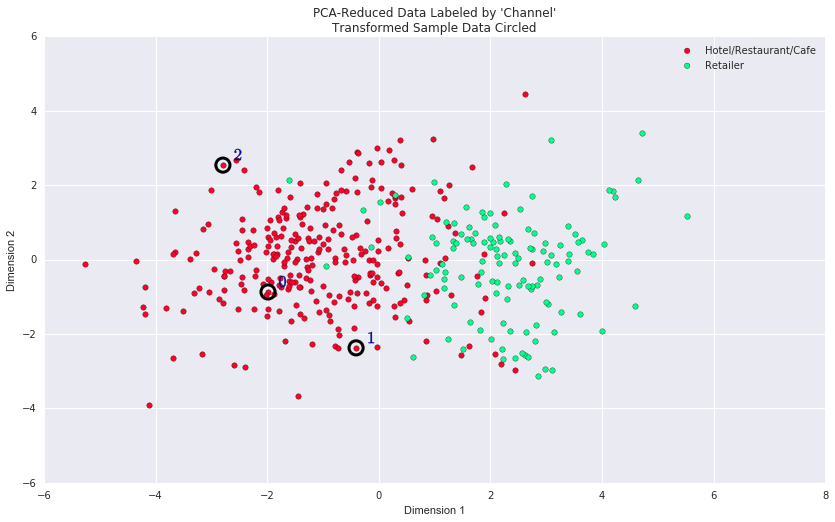

In [196]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Segment 0 aligns pretty closely with the Hotel / Restaurant / Cafe Channel, and Segment 1 corresponds to the Retailer channel.  Most of the separation is due to differences along the first dimension.  High values in dimension 1 are in segment 1 (Retailer), and low values are in segment 0 (Hotel / Restaurant / Cafe). So for customers that are at the extremes along dimension 1 (either very far left or very far right), they have a higher probability associated with their given segment.

The Channel classification aligns pretty closely with the segments found using clustering.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.